In [3]:
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("./Iris.csv")
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [20]:
row_labels = df.index[:]
col_labels = df.columns[[2,3,4]]
df1 = df.loc[row_labels,col_labels]
df1

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [95]:
df["Species"].drop_duplicates()

0          Iris-setosa
50     Iris-versicolor
100     Iris-virginica
Name: Species, dtype: object

Text(0, 0.5, 'Species')

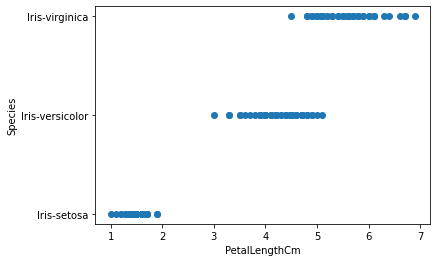

In [26]:
import matplotlib.pyplot as plt
plt = plt.figure()
ax = plt.subplots()
x = df1["PetalLengthCm"]
y = df1["Species"]
ax.scatter(x,y)
ax.set_xlabel("PetalLengthCm")
ax.set_ylabel("Species")

Text(0, 0.5, 'Species')

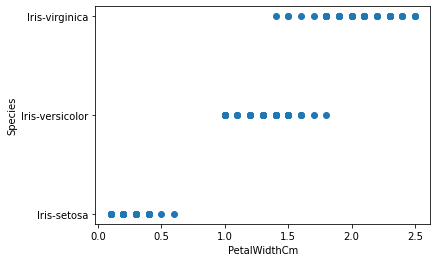

In [27]:
import matplotlib.pyplot as plt
plt = plt.figure()
ax = plt.subplots()
x = df1["PetalWidthCm"]
y = df1["Species"]
ax.scatter(x,y)
ax.set_xlabel("PetalWidthCm")
ax.set_ylabel("Species")

要把df数据转为KMeans刻度的数据np.array

In [78]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[10, 20], [30, 40]])
np.concatenate((arr1, arr2),axis=1)

array([[ 1,  2, 10, 20],
       [ 3,  4, 30, 40]])

In [84]:
data1 = df1.loc[df1.index[:],df1.columns[0]].to_numpy()
data2 = df1.loc[df1.index[:],df1.columns[1]].to_numpy()
# data = np.array()
data = np.array(list(zip(data1,data2)))
data.shape

(150, 2)

现在要用花瓣的长度和宽度来分类150个样本，分成三类，最后要形成三个聚类

先画sse k 图

In [58]:
# # -*- coding: utf-8 -*-
# """
# K-means-Single-Test
# """
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from tools.preprocess import *
# from tools.visualizer import plot_result
# from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
# from sklearn.decomposition import PCA, TruncatedSVD
# from tools.labelText import LabelText
# import settings
# import time
# import pandas as pd
# from sklearn import metrics
 
# """
# loading source
# 载入资源
# """
# print('------Loading Source...')
# ori_path = settings.SOURCE_DATA + 'goods_data.csv'
# # sentences = loading_source(file_name=ori_path)
# sentences = []
# # content_lines = loading_source(file_name=ori_path)
# # ori_path = settings.SOURCE_DATA + 'cut_data.csv'
# sentences = loading_source(file_name=ori_path)
# # start = time.time()
# # cut_source(content_lines, sentences, write=True)
# # end = time.time()
# # print('------- cutting cost', end - start)
 
 
# """
# Compute K-Means
# """
 
# numOfClass: int = 10
# SSE = []  # 存放每次结果的误差平方和
# for i in range(20,300,20):
#     start = time.time()
#     clf = KMeans(n_clusters=i, max_iter=10000, init="k-means++", tol=1e-6)
 
#     result = clf.fit(trainingData)
#     end = time.time()
#     print("n_cluster is ",i," time is",end-start)
#     SSE.append(clf.inertia_)
# X = range(20,300,20)
# plt.xlabel('k')
# plt.ylabel('SSE')
# plt.plot(X, SSE, 'o-')
# plt.savefig('sse.png')

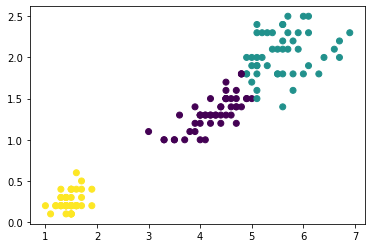

In [100]:
import matplotlib.pyplot as plt
k = 3
model = KMeans(k)
model.fit(data)
yhat = model.predict(data)
clusters = unique(yhat)
plt.scatter(data[:,0],data[:,1],c=yhat)


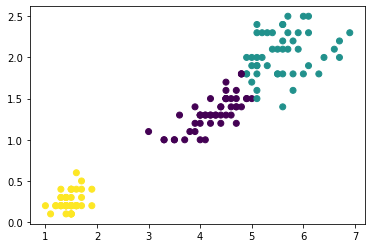

In [103]:
import matplotlib.pyplot as plt
c = df["Species"].to_numpy()
plt.scatter(data[:,0],data[:,1],c=yhat)


一模一样！！！！

画一个sse k 图

In [120]:
c = model.cluster_centers_

In [138]:
c

array([[3.75866667, 1.19866667]])

array([86.40394534, 31.38775897, 19.48238901, 14.09372176, 11.10362366,
        9.22580873,  7.63789697,  6.58757685,  5.58979245,  5.14326677,
        4.76748077,  4.37359199,  4.06116044,  3.5982234 ,  3.28428932,
        3.08647609,  3.01715192,  2.70158694])

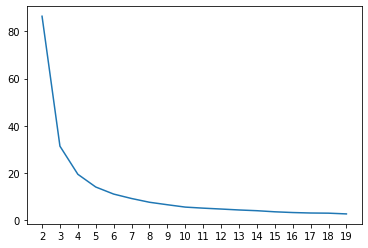

In [140]:
def zhoubu(x):
    #x代表需要聚类数据的坐标
    import numpy as np
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt#导入库
    Sum=np.zeros(18)#Sum用于储存肘部法则判断指标
    for i in range(2,20):
        kmeans=KMeans(n_clusters=i).fit(x)#kmeans算法拟合
        m=kmeans.labels_#取出分类得出的标签
        c=kmeans.cluster_centers_#取出每个分类中心
        for j in range(len(x)):
            c1=c[m[j]]#第j个样本所属类的中心
            x1=x[j]#第j个样本的坐标
            Sum[i-2]=Sum[i-2]+sum((x1-c1)**2)#计算判断指标
    c=plt.plot(np.arange(2,20),Sum )
    plt.xticks(np.arange(2,20))#绘图
    return Sum
zhoubu(data)


由手肘图知，k=3较好